## Imports

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error, mean_squared_error, mean_absolute_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import PassiveAggressiveRegressor

## Data

In [112]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [113]:
train.head()

id  store_sales(in millions)  unit_sales(in millions)  total_children  \
0   0                      8.61                      3.0             2.0   
1   1                      5.00                      2.0             4.0   
2   2                     14.08                      4.0             0.0   
3   3                      4.02                      3.0             5.0   
4   4                      2.13                      3.0             5.0   

   num_children_at_home  avg_cars_at home(approx).1  gross_weight  \
0                   2.0                         2.0         10.30   
1                   0.0                         3.0          6.66   
2                   0.0                         3.0         21.30   
3                   0.0                         0.0         14.80   
4                   0.0                         3.0         17.00   

   recyclable_package  low_fat  units_per_case  store_sqft  coffee_bar  \
0                 1.0      0.0            32.0     36509.0         0.0   
1                 1.0      0.0             1.0     28206.0         1.0   
2                 1.0      0.0            26.0     21215.0         1.0   
3                 0.0      1.0            36.0     21215.0         1.0   
4                 1.0      1.0            20.0     27694.0         1.0   

   video_store  salad_bar  prepared_food  florist    cost  
0          0.0        0.0            0.0      0.0   62.09  
1          0.0        0.0            0.0      0.0  121.80  
2          0.0        0.0            0.0      0.0   83.51  
3          0.0        0.0            0.0      0.0   66.78  
4          1.0        1.0            1.0      1.0  111.51

In [114]:
train.columns

Index(['id', 'store_sales(in millions)', 'unit_sales(in millions)',
       'total_children', 'num_children_at_home', 'avg_cars_at home(approx).1',
       'gross_weight', 'recyclable_package', 'low_fat', 'units_per_case',
       'store_sqft', 'coffee_bar', 'video_store', 'salad_bar', 'prepared_food',
       'florist', 'cost'],
      dtype='object')

In [115]:
train.drop('id', axis = 1, inplace = True)

In [116]:
train.describe()

store_sales(in millions)  unit_sales(in millions)  total_children  \
count             360336.000000            360336.000000   360336.000000   
mean                   6.337376                 3.043881        2.456482   
std                    3.307980                 0.784676        1.488992   
min                    0.510000                 1.000000        0.000000   
25%                    3.720000                 3.000000        1.000000   
50%                    5.780000                 3.000000        2.000000   
75%                    8.400000                 4.000000        4.000000   
max                   22.920000                 6.000000        5.000000   

       num_children_at_home  avg_cars_at home(approx).1   gross_weight  \
count         360336.000000               360336.000000  360336.000000   
mean               0.689390                    2.203813      13.822071   
std                1.214732                    1.084293       4.614792   
min                0.000000                    0.000000       6.000000   
25%                0.000000                    1.000000       9.710000   
50%                0.000000                    2.000000      13.600000   
75%                1.000000                    3.000000      17.700000   
max                5.000000                    4.000000      21.900000   

       recyclable_package        low_fat  units_per_case     store_sqft  \
count       360336.000000  360336.000000   360336.000000  360336.000000   
mean             0.568086       0.327797       18.972706   28180.333442   
std              0.495343       0.469411       10.212912    5968.874074   
min              0.000000       0.000000        1.000000   20319.000000   
25%              0.000000       0.000000       10.000000   23593.000000   
50%              1.000000       0.000000       20.000000   27694.000000   
75%              1.000000       1.000000       28.000000   33858.000000   
max              1.000000       1.000000       36.000000   39696.000000   

          coffee_bar    video_store      salad_bar  prepared_food  \
count  360336.000000  360336.000000  360336.000000  360336.000000   
mean        0.564839       0.277394       0.504807       0.504832   
std         0.495779       0.447713       0.499978       0.499977   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         1.000000       0.000000       1.000000       1.000000   
75%         1.000000       1.000000       1.000000       1.000000   
max         1.000000       1.000000       1.000000       1.000000   

             florist           cost  
count  360336.000000  360336.000000  
mean        0.503191      99.614729  
std         0.499991      29.939435  
min         0.000000      50.790000  
25%         0.000000      70.320000  
50%         1.000000      98.810000  
75%         1.000000     126.620000  
max         1.000000     149.750000

In [117]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360336 entries, 0 to 360335
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   store_sales(in millions)    360336 non-null  float64
 1   unit_sales(in millions)     360336 non-null  float64
 2   total_children              360336 non-null  float64
 3   num_children_at_home        360336 non-null  float64
 4   avg_cars_at home(approx).1  360336 non-null  float64
 5   gross_weight                360336 non-null  float64
 6   recyclable_package          360336 non-null  float64
 7   low_fat                     360336 non-null  float64
 8   units_per_case              360336 non-null  float64
 9   store_sqft                  360336 non-null  float64
 10  coffee_bar                  360336 non-null  float64
 11  video_store                 360336 non-null  float64
 12  salad_bar                   360336 non-null  float64
 13  prepared_food 

In [118]:
train.duplicated().value_counts()[0]

360336

## Visualization

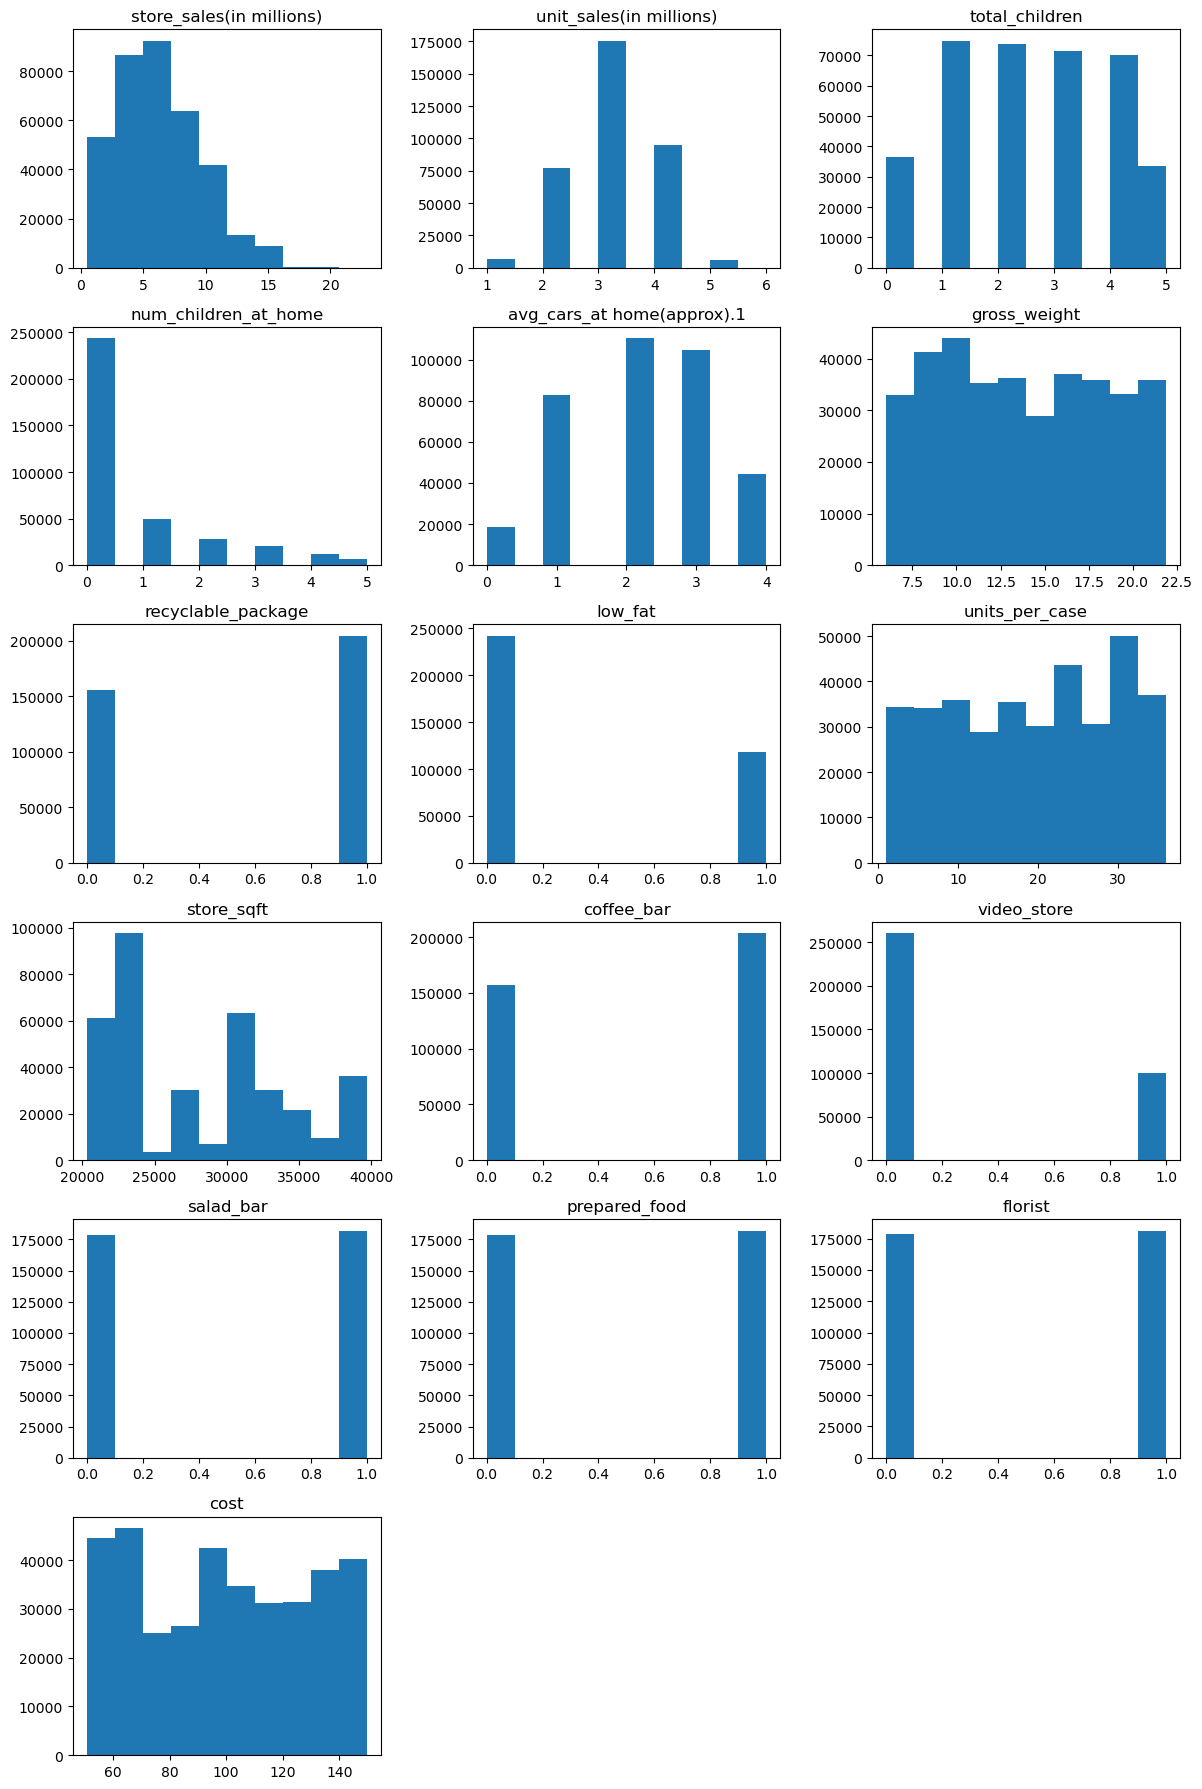

In [119]:
lista_colunas = list(train.columns)
plt.figure(figsize = (12, 18))
for i in range(len(lista_colunas)):
    plt.subplot(6, 3, i + 1)
    plt.title(lista_colunas[i])
    plt.hist(train[lista_colunas[i]])
    
plt.tight_layout()

<AxesSubplot:xlabel='cost'>

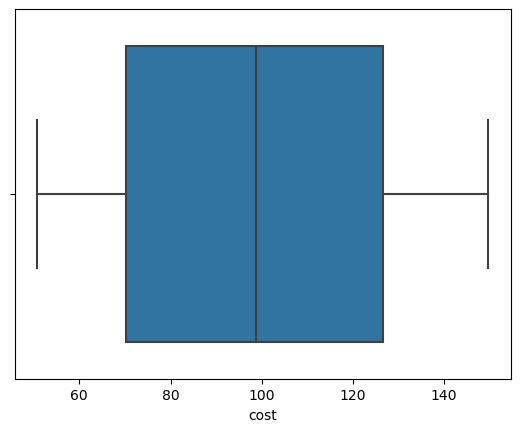

In [120]:
sns.boxplot(x = 'cost', data = train)

<AxesSubplot:xlabel='gross_weight'>

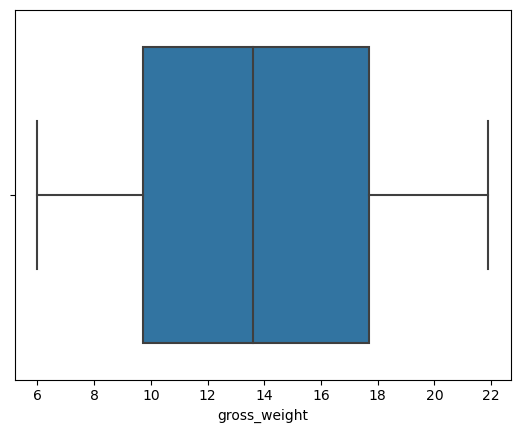

In [121]:
sns.boxplot(x = 'gross_weight', data = train)

<AxesSubplot:xlabel='store_sales(in millions)'>

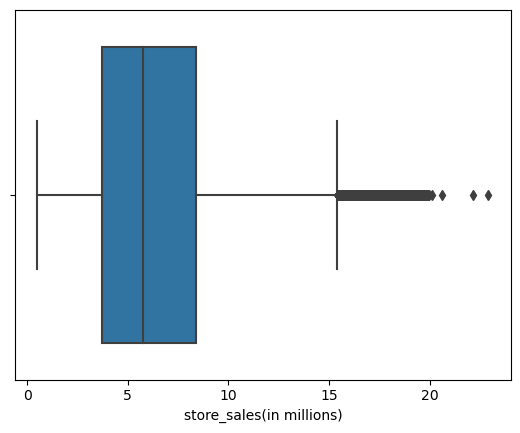

In [122]:
sns.boxplot(x = "store_sales(in millions)", data = train)

<AxesSubplot:xlabel='store_sqft'>

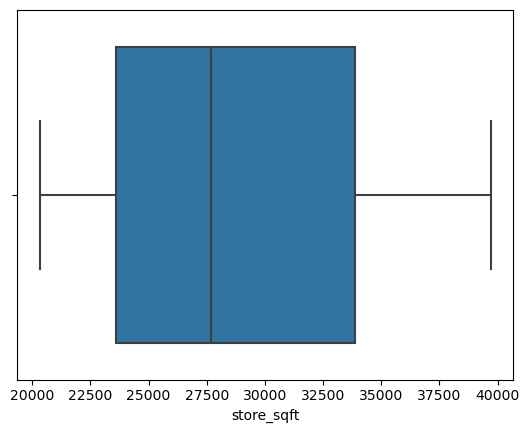

In [123]:
sns.boxplot(x = 'store_sqft', data = train)

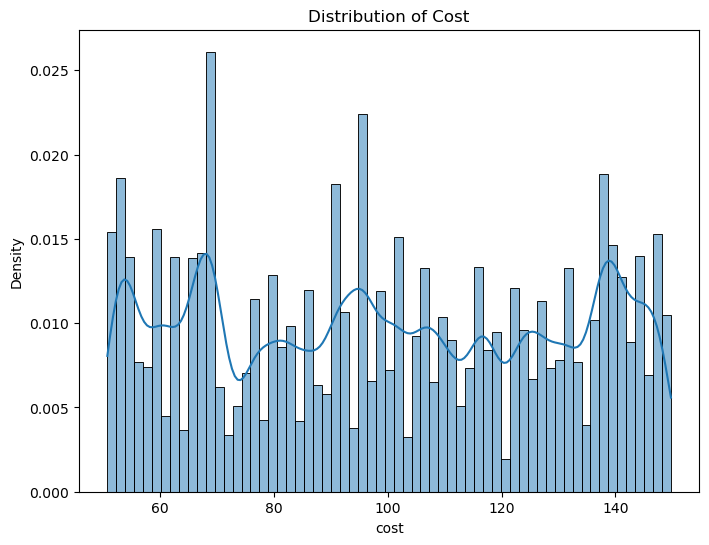

In [124]:
plt.figure(figsize = (8, 6))
sns.histplot(data = train['cost'], kde = True, stat = 'density').set(title = 'Distribution of Cost');

<AxesSubplot:>

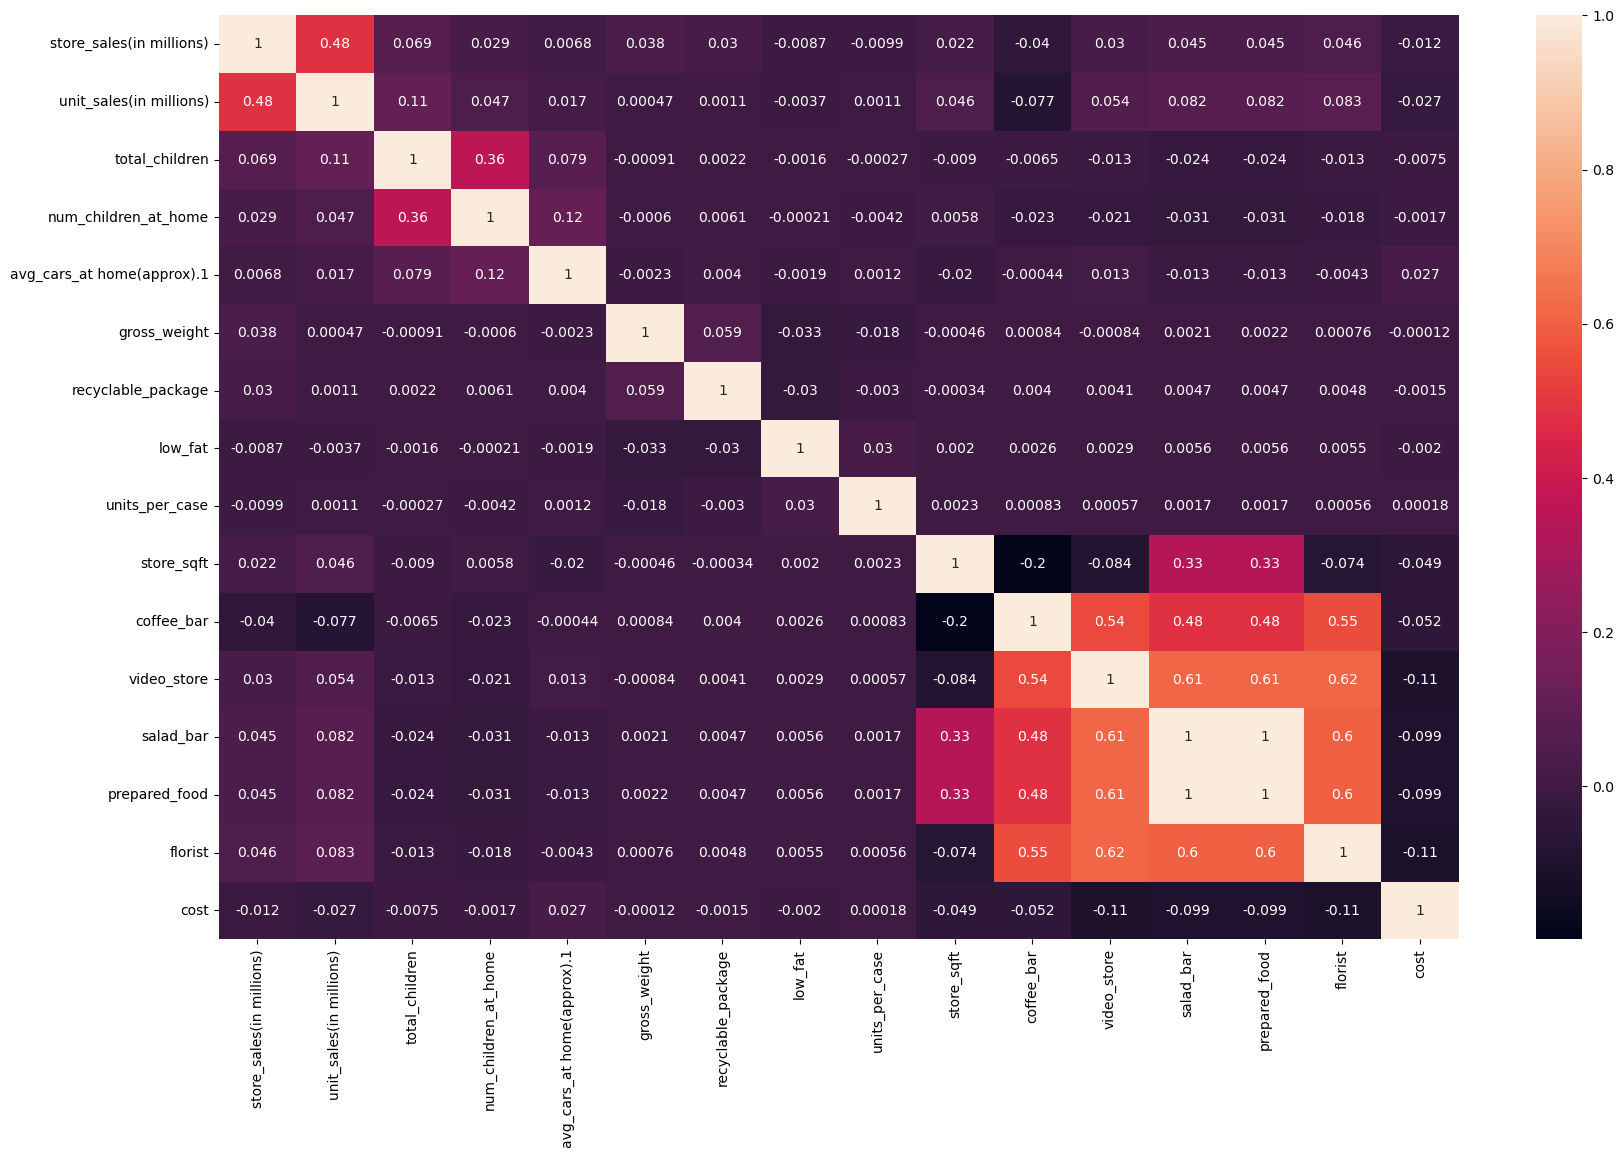

In [125]:
plt.figure(figsize = (20, 12))
sns.heatmap(train.corr(), annot = True)

## Turning unnecessary floats into int

In [126]:
# unnecessary column
train.drop('store_sqft', axis = 1, inplace = True)

In [127]:
float_col_to_int = ['unit_sales(in millions)', 'total_children', 'num_children_at_home',
                    'avg_cars_at home(approx).1', 'recyclable_package',
                    'low_fat', 'coffee_bar', 'video_store', "salad_bar", 'prepared_food']
for c in float_col_to_int:
    train[c] = train[c].astype('int64')

In [128]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360336 entries, 0 to 360335
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   store_sales(in millions)    360336 non-null  float64
 1   unit_sales(in millions)     360336 non-null  int64  
 2   total_children              360336 non-null  int64  
 3   num_children_at_home        360336 non-null  int64  
 4   avg_cars_at home(approx).1  360336 non-null  int64  
 5   gross_weight                360336 non-null  float64
 6   recyclable_package          360336 non-null  int64  
 7   low_fat                     360336 non-null  int64  
 8   units_per_case              360336 non-null  float64
 9   coffee_bar                  360336 non-null  int64  
 10  video_store                 360336 non-null  int64  
 11  salad_bar                   360336 non-null  int64  
 12  prepared_food               360336 non-null  int64  
 13  florist       

## Train and Test

In [129]:
X = train.drop('cost', axis = 1)
y = train['cost']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Models

### DecisionTreeRegressor

In [130]:
dt = DecisionTreeRegressor(random_state = 0)
dt.fit(xtrain, ytrain)
pred_dt = dt.predict(xtest)
    
print("MSE: ", mean_squared_error(ytest, pred_dt, squared = False))
print("MAE: ", mean_absolute_error(ytest, pred_dt))
print("MSLE", mean_squared_log_error(ytest, pred_dt, squared = False))

MSE:  41.12959006512355
MAE:  32.766666472403536
MSLE 0.43466642038614633


### BayesianRidge

In [131]:
br = BayesianRidge()
br.fit(xtrain, ytrain)
pred_br = br.predict(xtest)
    
print("MSE: ", mean_squared_error(ytest, pred_br, squared = False))
print("MAE: ", mean_absolute_error(ytest, pred_br))
print("MSLE", mean_squared_log_error(ytest, pred_br, squared = False))

MSE:  29.69414158148804
MAE:  25.727703531435946
MSLE 0.3174205672876803


### LinearRegression

In [132]:
lr = LinearRegression()
lr.fit(xtrain, ytrain)
pred_lr = lr.predict(xtest)
    
print("MSE: ", mean_squared_error(ytest, pred_lr, squared = False))
print("MAE: ", mean_absolute_error(ytest, pred_lr))
print("MSLE", mean_squared_log_error(ytest, pred_lr, squared = False))

MSE:  29.694153352820283
MAE:  25.72811036429786
MSLE 0.3174176532433555


### Ridge

In [133]:
ridge = Ridge(random_state = 0)
ridge.fit(xtrain, ytrain)
pred_ridge = ridge.predict(xtest)
    
print("MSE: ", mean_squared_error(ytest, pred_ridge, squared = False))
print("MAE: ", mean_absolute_error(ytest, pred_ridge))
print("MSLE", mean_squared_log_error(ytest, pred_ridge, squared = False))

MSE:  29.694161415045407
MAE:  25.728116620268224
MSLE 0.3174177642122187


### PassiveAggressiveRegressor

In [134]:
pa = PassiveAggressiveRegressor(random_state = 0)
pa.fit(xtrain, ytrain)
pred_pa = pa.predict(xtest)
    
print("MSE: ", mean_squared_error(ytest, pred_pa, squared = False))
print("MAE: ", mean_absolute_error(ytest, pred_pa))
print("MSLE", mean_squared_log_error(ytest, pred_pa, squared = False))

MSE:  37.68952623393321
MAE:  31.077410078835545
MSLE 0.39390403312122435


_

## Test


In [135]:
test.drop(['id', 'store_sqft'], axis = 1, inplace = True)

In [136]:
pred_dt = dt.predict(test)

## Submission - DecisionTreeRegressor

In [137]:
submission = pd.read_csv('data/sample_submission.csv')
submission['cost'] = pred_dt

In [138]:
submission.head()

id     cost
0  360336  108.825
1  360337   51.120
2  360338   77.720
3  360339   54.360
4  360340   62.400

_